# Project: Wrangling and Analyze Data

##  Data Gathering


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import re
import time
import datetime
from IPython.display import Image
import requests
import tweepy
%matplotlib inline

In [5]:
#reading the csv file
df = pd.read_csv("twitter-archive-enhanced.csv")
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
#first 5 rows in the file
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#shape of the dataframe with number of columns and rows
df.shape

(2356, 17)

In [6]:
#descriptive statistics
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
#columns in the dataframe
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
#reading image predictions file
df1 = pd.read_csv("image_predictions.tsv")
df1

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
5,666050758794694657\thttps://pbs.twimg.com/medi...
6,666051853826850816\thttps://pbs.twimg.com/medi...
7,666055525042405380\thttps://pbs.twimg.com/medi...
8,666057090499244032\thttps://pbs.twimg.com/medi...
9,666058600524156928\thttps://pbs.twimg.com/medi...


In [9]:
#first 5 rows in the file
df1.head()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [10]:
#keys
consumer_key = ""                               
consumer_secret = ""
#access tokens
access_token = ""      
access_secret = ""          

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [12]:
#forming the dictionary to store the data list from twitter API

tweets = []
dict_tweet= {}
#Saving the tweets id's not available in a list 

tweet_id_not_available = []

for tweet_id in df["tweet_id"]:   

    try:
       statusofthetweet = api.get_status(tweet,tweet_mode = 'compat',
                                    wait_on_rate_limit = True)
       dict_tweet[str(tweet)] = statusofthetweet ._json   
    except:
        tweets.append(str(tweet_id)) 
        
print("Unable to find tweet_id for the tweet id:",tweet_id)
print("The list of tweets:" ,len(tweets))

Unable to find tweet_id for the tweet id: 666020888022790149
The list of tweets: 2356


In [13]:
#adding objects into a list
dict = []
for json_tweet in tweets:
    dict.append(json_tweet)

In [14]:
#writing list in text file
with open('tweet_json.txt', mode= 'w') as file:
      json.dump(dict_tweet, file)

In [15]:
#selecting significant data elements
import json
from json import dumps
list = []
with open('tweet_json.txt') as file:
    for line in file:
        data= json.loads(line) 
        user= data.get('user')
        url= data.get('https')
        twt_id= data.get('id_str')
        fl_c= data.get('followers_count')
        fr_c= data.get('friends_count')
        rc= data.get('retweet_count')
        fc= data.get('favorite_count')
        list.append({'twt_id':twt_id ,'fl_c':fl_c, 'fr_c':fr_c,
                        'rc': rc,
                        'fc': fc})

In [16]:
#creating a dafaframe with the data elements
twt_ct = pd.DataFrame(list, columns = ['url', 'twt_id','fl_c', 'fr_c','fc','rc'])

## Data Assessment

In [17]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
img_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
846,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False


In [22]:
df.text.sample(5)

382     RT @dog_rates: This is Phil. He's an important...
1411    This is Oliver. He does toe touches in his sle...
153     This is Jersey. He likes to watch movies, but ...
1942    🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...
1462    This is Archie. He's a Bisquick Taj Mapaw. Too...
Name: text, dtype: object

In [23]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
df['name'].value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Bo           9
Name: name, dtype: int64

In [28]:
df['source'].value_counts().head(10)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
Image(url = 'https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg')

In [31]:
Image(url = 'https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg')

In [32]:
img_pred['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [33]:
img_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
img_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [35]:
img_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
img_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [37]:
img_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [38]:
img_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [39]:
img_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

## Data Cleaning

In [6]:
df_clean = df.copy()
img_clean = img_pred.copy()
tweet_json_clean = twt_ct.copy()

NameError: name 'img_pred' is not defined

### Handling multiple dogstages
There were some tweets having multiple dog names which need to be cleaned.

In [8]:
# handling none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merging into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

# handling multiple stages
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handling missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [9]:
#testing dataframe for the dognames
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN


### Issues:

Quality issues:
1.To convert timestamp to date-time variable.
2.ID fields should be objects.
3.To delete the retweets.
4.To standardize the breed names of the dogs.
5.Issue with dog names.
6.Dropping unnecessary columns.
7.To remove the duplicated images.
8.Source column must be categorical.
9.Ratings.

Tidiness issues:
1.To merge tweet_json_clean and df_clean tables.
2.To merge the 4 dogtypes into a single column.

In [87]:
from functools import reduce
df_com = [df_clean ,img_clean ,tweet_json_clean]
df_com=reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='outer'), 
                  df_com).fillna('void')

In [43]:
df_com.head()

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,url,twt_id,fl_c,fr_c,fc,rc
0,892420643555336193,void,void,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,void,void,void,https://twitter.com/dog_rates/status/892420643...,...,True,Shetland_sheepdog,0.0614285,True,void,void,void,void,void,void
1,892177421306343426,void,void,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,void,void,void,https://twitter.com/dog_rates/status/892177421...,...,True,Rhodesian_ridgeback,0.07201,True,void,void,void,void,void,void
2,891815181378084864,void,void,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,void,void,void,https://twitter.com/dog_rates/status/891815181...,...,True,bloodhound,0.116197,True,void,void,void,void,void,void
3,891689557279858688,void,void,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,void,void,void,https://twitter.com/dog_rates/status/891689557...,...,True,miniature_pinscher,0.222752,True,void,void,void,void,void,void
4,891327558926688256,void,void,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,void,void,void,https://twitter.com/dog_rates/status/891327558...,...,True,Doberman,0.154629,True,void,void,void,void,void,void


In [44]:
df_com.columns

Index(['tweet_id_x', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'tweet_id_y',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'url', 'twt_id', 'fl_c', 'fr_c',
       'fc', 'rc'],
      dtype='object')

In [45]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 36 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                    

### 1. Converting timestamp to date-time variable

Define

Timestamp is present in the dataset. It can be converted timestamp to the datetime datatype for better assessment.

Code

In [46]:
df_com["timestamp"] = pd.to_datetime(df_com["timestamp"])

Test

In [47]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 36 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage            

### 2. ID fields should be objects

Define

The tweet id is present as int datatype and it can be converted to string as it is not invloved in mathematical calculations.

Code

In [48]:
df.tweet_id = df.tweet_id.astype(str)

Test

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### 3. To delete the retweets

Define

There were retweets in the dataset. So I have deleted the retweets using pd.notnull() method.

Code

In [50]:
#df = df.drop(['retweeted_status_id'] , axis=1)
#I have used the above code to drop the columns related to retweets. But when I tried to run again, I am getting error. So I am writing it as a comment. 

Test

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### 4. Checking for duplicate values and deleteing them


Define

There were some duplicated values in the dataset. I will remove them using .duplicated method. 

Code

In [52]:
df.drop_duplicates(inplace = True)


Test

In [53]:
df[df.duplicated()].sum()


tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

### 5. Naming issue

Define

There were some naming issues with the dog names in the dataset. I am solving those issues using str.replace() method.

Code

In [54]:
df.name = df.name.str.replace('^[a-z]+', 'None')
df['name'].value_counts()

None         854
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
Daisy          7
Toby           7
Buddy          7
Bailey         7
Milo           6
Dave           6
Leo            6
Bella          6
Scout          6
Koda           6
Jack           6
Rusty          6
Oscar          6
Stanley        6
Jax            6
Louis          5
Finn           5
Phil           5
Oakley         5
            ... 
Ben            1
Ginger         1
Patch          1
Kloey          1
Strudel        1
Halo           1
Tove           1
Carper         1
Lance          1
Andru          1
Al             1
Arnold         1
Scruffers      1
Franq          1
Rorie          1
Autumn         1
Bauer          1
Burt           1
Kevon          1
Gert           1
Monty          1
Cedrick        1
Duddles        1
Jeffrie        1
Aja            1
Ralphus        1
Maisey         1
Antony        

Test

In [55]:
df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### 6. Dropping unnecessary columns

Define

There were some columns such as in_reply_to_status_id,source which are not necessary. I am removing those columns.

Code

In [56]:
df.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source'], axis = 1, inplace=True)

Test

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 276.1+ KB


### 7. To standardize the breed names of the dogs.

Define

Some of the dog names are in capital leeters and some of them are in small letters. So standardizing the dog names into lowercase characters. 

Code

In [58]:
img_clean['p1'] = img_clean['p1'].str.lower()
img_clean['p2'] = img_clean['p2'].str.lower()
img_clean['p3'] = img_clean['p3'].str.lower()

Test

In [59]:
img_clean[["tweet_id","p1","p2","p3"]].head(5)

,tweet_id,p1,p2,p3
0,666020888022790149,welsh_springer_spaniel,collie,shetland_sheepdog
1,666029285002620928,redbone,miniature_pinscher,rhodesian_ridgeback
2,666033412701032449,german_shepherd,malinois,bloodhound
3,666044226329800704,rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,miniature_pinscher,rottweiler,doberman


In [60]:
df_com.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Bailey        7
Toby          7
Daisy         7
Koda          6
Stanley       6
Jack          6
Jax           6
Oscar         6
Bella         6
Scout         6
Leo           6
Dave          6
Rusty         6
Milo          6
Phil          5
           ... 
Binky         1
Hamrick       1
Tiger         1
Mollie        1
Kuyu          1
Antony        1
Maisey        1
Ralphus       1
Franq         1
Taco          1
Karma         1
Glenn         1
Odin          1
Carper        1
Andru         1
Al            1
Arnold        1
Zuzu          1
Rorie         1
Aja           1
Autumn        1
Bauer         1
Burt          1
Lance         1
Kevon         1
Monty         1
Cedrick       1
Duddles       1
Jeffrie       1
Einstein      1
Name: name, Length: 957,

### 8.To remove the duplicated images

Define

There were duplicated images in the dataset. They need to be removed with the link inorder to look clean.


Code

In [61]:
img_dup = img_pred.jpg_url.duplicated()
img_dup = np.logical_not(img_dup)
img_clean = img_clean[img_dup]
print("Rows before removing the duplicated images: {}.\nRows after removing the duplicated images: {}.".format(img_clean.shape[0], img_pred.shape[0]))

Rows before removing the duplicated images: 2009.
Rows after removing the duplicated images: 2075.


Test

In [62]:
print("{} images are duplicated.".format(sum(img_clean.jpg_url.duplicated())))

0 images are duplicated.


### 9. Source must be category

Define

As source column must be categorical, I am converting to string data type using .astype method.

Code

In [68]:
df['source'] = df['source'].astype('category')

Test

In [69]:
type('source')

str

### 10. Ratings

Define

Converting the datatype of rating numerator form int to float.


Code

In [73]:
df['rating_numerator'] = df['rating_numerator'].astype('float')

Test

In [74]:
type('rating_numerator')

str

## Tidiness issues

### 1. To merge the 4 dogtypes into a single column

Define

There were four columns for each dog type. I am merging all the columns to a single column.


Code

In [75]:
df_com["type"] = df_com["text"].str.extract("(doggo,floofer,puppo,pupper)")


In [76]:
df_com[["type", "doggo", "floofer", "puppo", "pupper"]].sample(10)

,type,doggo,floofer,puppo,pupper
1133,NaN,,,,
773,NaN,,,,
2121,NaN,,,,
212,NaN,,,,
2326,NaN,,,,
518,NaN,,,,
1932,NaN,,,,
1272,NaN,,,,
719,NaN,,,,
174,NaN,,,,


Test

In [77]:
df_com.head(20)

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,url,twt_id,fl_c,fr_c,fc,rc,type
0,892420643555336193,void,void,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,void,void,void,https://twitter.com/dog_rates/status/892420643...,...,Shetland_sheepdog,0.0614285,True,void,void,void,void,void,void,NaN
1,892177421306343426,void,void,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,void,void,void,https://twitter.com/dog_rates/status/892177421...,...,Rhodesian_ridgeback,0.07201,True,void,void,void,void,void,void,NaN
2,891815181378084864,void,void,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,void,void,void,https://twitter.com/dog_rates/status/891815181...,...,bloodhound,0.116197,True,void,void,void,void,void,void,NaN
3,891689557279858688,void,void,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,void,void,void,https://twitter.com/dog_rates/status/891689557...,...,miniature_pinscher,0.222752,True,void,void,void,void,void,void,NaN
4,891327558926688256,void,void,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,void,void,void,https://twitter.com/dog_rates/status/891327558...,...,Doberman,0.154629,True,void,void,void,void,void,void,NaN
5,891087950875897856,void,void,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,void,void,void,https://twitter.com/dog_rates/status/891087950...,...,Greater_Swiss_Mountain_dog,0.0161992,True,void,void,void,void,void,void,NaN
6,890971913173991426,void,void,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,void,void,void,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,terrapin,0.0178853,False,void,void,void,void,void,void,NaN
7,890729181411237888,void,void,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,void,void,void,https://twitter.com/dog_rates/status/890729181...,...,fur_coat,0.0544486,False,void,void,void,void,void,void,NaN
8,890609185150312448,void,void,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,void,void,void,https://twitter.com/dog_rates/status/890609185...,...,golden_retriever,0.00795896,True,void,void,void,void,void,void,NaN
9,890240255349198849,void,void,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,void,void,void,https://twitter.com/dog_rates/status/890240255...,...,soft-coated_wheaten_terrier,0.0820861,True,void,void,void,void,void,void,NaN


In [78]:
df_com.columns

Index(['tweet_id_x', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'tweet_id_y',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'url', 'twt_id', 'fl_c', 'fr_c',
       'fc', 'rc', 'type'],
      dtype='object')

### 2. To merge tweet_json_clean and df_clean tables.

Define
The tables tweet_json_clean and df_clean can be merged using join method for better assessment.

Code

In [79]:
df_merge = pd.merge(df_clean, tweet_json_clean, left_index=True, right_index=True)

Test

In [80]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 24 columns):
tweet_id                      1 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1 non-null object
source                        1 non-null object
text                          1 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1 non-null object
rating_numerator              1 non-null int64
rating_denominator            1 non-null int64
name                          1 non-null object
doggo                         1 non-null object
floofer                       1 non-null object
pupper                        1 non-null object
puppo                         1 non-null object
dog_stage                     0 non-null object
url                           0 no

### Storing the dataframe into csv file.

In [81]:
df_com.to_csv('twitter_archive_master.csv', index=False)
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')

In [82]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dog_stage                     2356 n

## Data Analysis

In [83]:
df_com.sample(5)

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,url,twt_id,fl_c,fr_c,fc,rc,type
1753,678800283649069056,void,void,2015-12-21 04:52:53,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with some mean tan lines. Snaz...,void,void,void,https://twitter.com/dog_rates/status/678800283...,...,Irish_setter,0.0344178,True,void,void,void,void,void,void,NaN
1684,681679526984871937,void,void,2015-12-29 03:33:58,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,void,void,void,https://twitter.com/dog_rates/status/681679526...,...,chow,0.0724747,True,void,void,void,void,void,void,NaN
907,757741869644341248,void,void,2016-07-26 00:58:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonard. He hides in bushes to escape ...,void,void,void,https://twitter.com/dog_rates/status/757741869...,...,Angora,0.104139,False,void,void,void,void,void,void,NaN
540,806542213899489280,void,void,2016-12-07 16:53:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,void,void,void,https://twitter.com/dog_rates/status/806542213...,...,Eskimo_dog,0.125547,True,void,void,void,void,void,void,NaN
638,793271401113350145,void,void,2016-11-01 02:00:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dave. It's his favorite day of the year. ...,void,void,void,https://twitter.com/dog_rates/status/793271401...,...,Great_Pyrenees,0.000223582,True,void,void,void,void,void,void,NaN


In [84]:
#correlation matrix
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
tweet_id,1,0.940568,0.135083,0.744733,0.144644,0.0494963,-0.0282727
in_reply_to_status_id,0.940568,1,0.136589,nan,nan,0.265525,-0.109931
in_reply_to_user_id,0.135083,0.136589,1,nan,nan,-0.0345929,-0.019973
retweeted_status_id,0.744733,nan,nan,1,0.168284,0.17193,-0.037949
retweeted_status_user_id,0.144644,nan,nan,0.168284,1,0.0166741,-0.00966819
rating_numerator,0.0494963,0.265525,-0.0345929,0.17193,0.0166741,1,0.150388
rating_denominator,-0.0282727,-0.109931,-0.019973,-0.037949,-0.00966819,0.150388,1


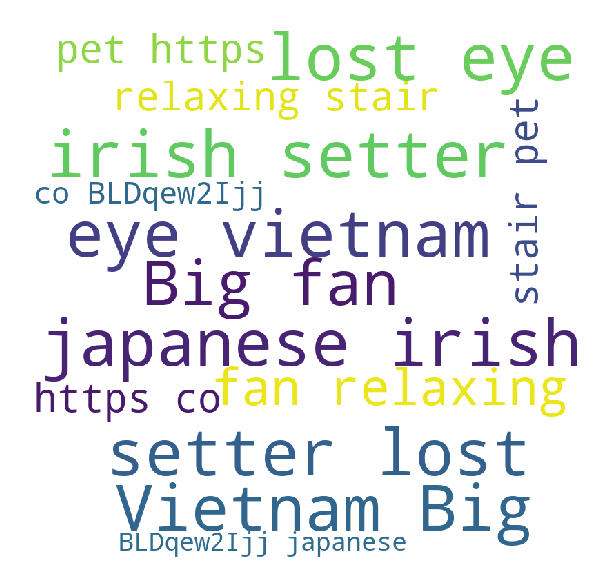

In [85]:
#Wordcloud of mostly repeated words

from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("twitter-archive-enhanced.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterating through the csv file
for val in df.text:

# typecasting each value to string
 val = str(val)

# splitting the value
 tokens = val.split()

# Converting tokens to lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = stopwords,
min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


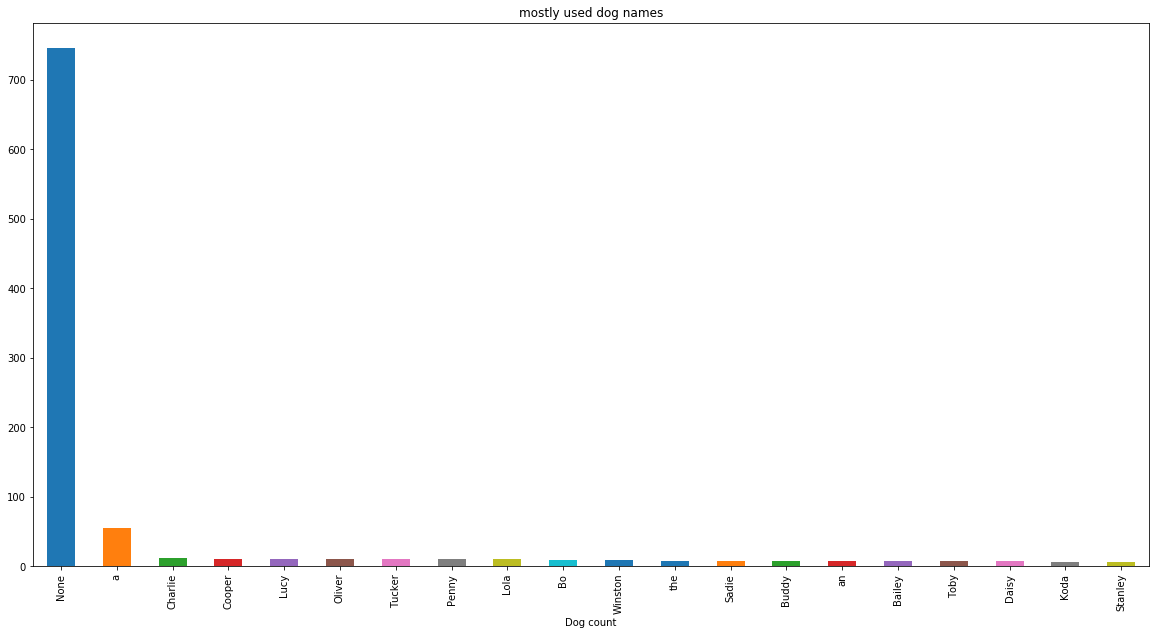

In [86]:
# Barplot for mostly used dog names

df_com.name.value_counts()[0:20].plot('bar', figsize=(20,10), title='mostly used dog names').set_xlabel("Dog count");

### Conclusion
Data Wrangling and analysis were performed in this project.
It involves data gathering that includes downlioading the csv file and uploading to the Jupyter python notebook and it also invlived collecteing data from API in Twitter. I have defined and solved 8 significant issues in the dataset.Finally the dataframe was stored in the form of a csv.

I observed that there is a strong correlation between the tweet_id and in_reply_to_status_id(0.940568). And with the help of wordcloud, I have extracted mostly repeated words in the tweets.Japanese,Irish,Bigfan,Setter and lost were some of the mostly used words. From the above barplot, we can observe that a, charlie, lucy, oliver, cooper, penny was the mostly used dog names.
